In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input,Dense
from keras.datasets import mnist
from sklearn.model_selection import train_test_split

In [2]:
(X_train,Y_train),(X_test,Y_test)= mnist.load_data()
X_train = X_train.astype('float32')/255
Y_train = Y_train.astype('float32')/255

X_train = X_train.reshape((len(X_train),np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test),np.prod(X_test.shape[1:])))

In [3]:
input_img = Input(shape=(784,))

# autoencoder architechture
encoded = Dense(128, activation='relu')(input_img)  # Encoder
decoded = Dense(784, activation='sigmoid')(encoded)  # Decoder


autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


Epoch 1/50
235/235 [==============================] - 4s 13ms/step - loss: 0.2148 - val_loss: -10075.6436
Epoch 2/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1171 - val_loss: -19437.8984
Epoch 3/50
235/235 [==============================] - 3s 14ms/step - loss: 0.0962 - val_loss: -28494.4160
Epoch 4/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0856 - val_loss: -38439.2305
Epoch 5/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0796 - val_loss: -47270.7109
Epoch 6/50
235/235 [==============================] - 4s 17ms/step - loss: 0.0760 - val_loss: -54224.8008
Epoch 7/50
235/235 [==============================] - 4s 16ms/step - loss: 0.0737 - val_loss: -59093.3438
Epoch 8/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0721 - val_loss: -63564.9531
Epoch 9/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0709 - val_loss: -66184.5547
Epoch 10/50
235/235 [=========================

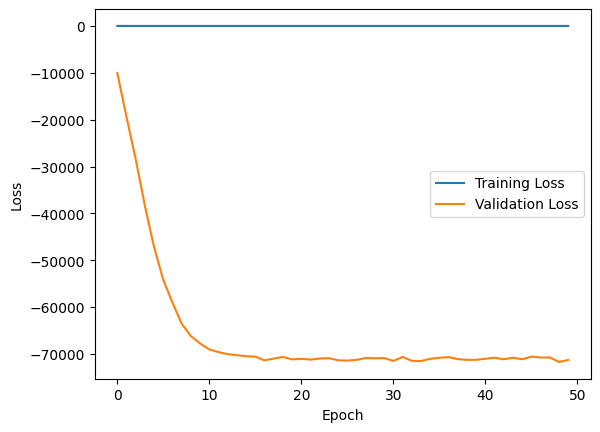

In [4]:
history = autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_test, X_test))



# Plot the training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [5]:
encoded_imgs = autoencoder.predict(X_test)
decoded_imgs = encoded_imgs

313/313 [==============================] - 1s 2ms/step


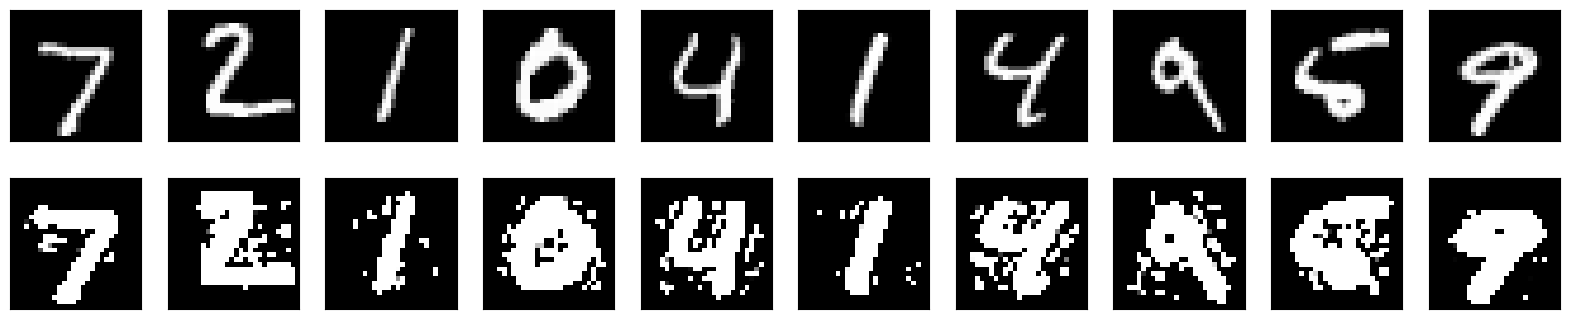

In [6]:
n = 10 # number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original Images
    # print(' \n\n Orignal Images:')
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed Images
    # print('\n\n Reconstructed Images: ')
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


Epoch 1/50
235/235 [==============================] - 3s 11ms/step - loss: 0.2151 - val_loss: 0.1345
Epoch 2/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1168 - val_loss: 0.1020
Epoch 3/50
235/235 [==============================] - 4s 17ms/step - loss: 0.0956 - val_loss: 0.0883
Epoch 4/50
235/235 [==============================] - 4s 16ms/step - loss: 0.0855 - val_loss: 0.0811
Epoch 5/50
235/235 [==============================] - 3s 14ms/step - loss: 0.0797 - val_loss: 0.0769
Epoch 6/50
235/235 [==============================] - 4s 16ms/step - loss: 0.0762 - val_loss: 0.0742
Epoch 7/50
235/235 [==============================] - 4s 15ms/step - loss: 0.0739 - val_loss: 0.0725
Epoch 8/50
235/235 [==============================] - 4s 17ms/step - loss: 0.0723 - val_loss: 0.0711
Epoch 9/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0712 - val_loss: 0.0702
Epoch 10/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0703 - val_los

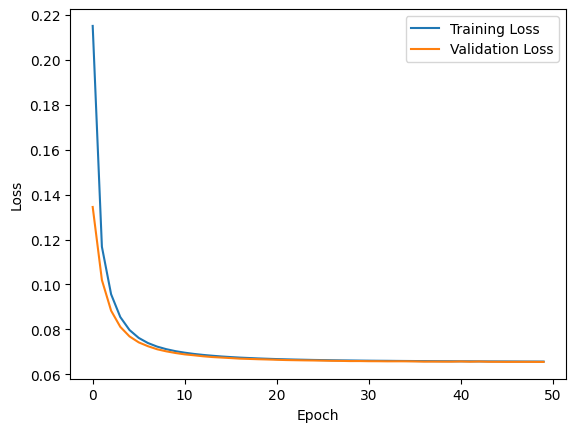

313/313 [==============================] - 1s 2ms/step


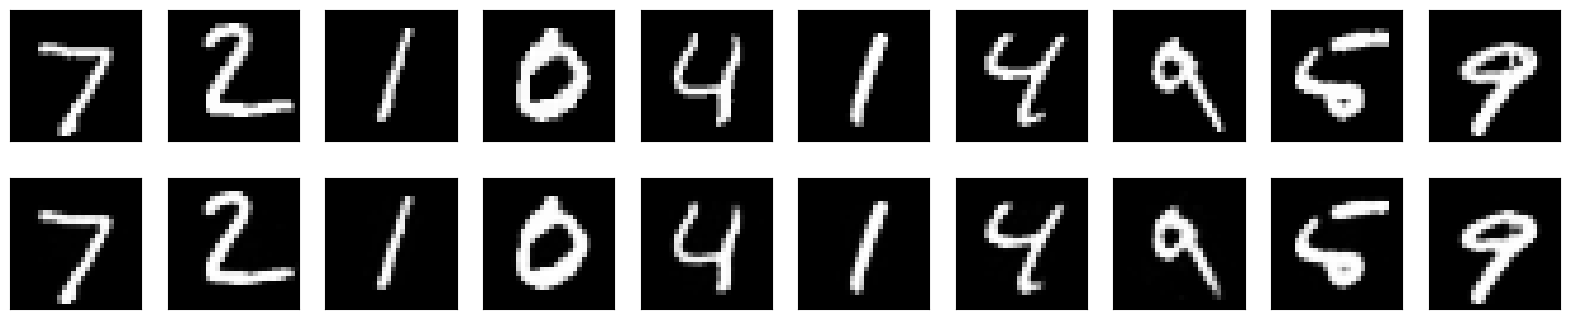

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# autoencoder architecture
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)  # Encoder
decoded = Dense(784, activation='sigmoid')(encoded)  # Decoder

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
history = autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))


# Plot the training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Encode and decode some test data
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = encoded_imgs

# Display the original and reconstructed images
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original Images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed Images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
